In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.util import random_noise

from PIL import Image

In [2]:
to_gray = lambda img:np.sum(img.copy() * [.299,.587,.114], axis=-1)

In [3]:
img = Image.open('prueba01.jpg')
img_g = to_gray(np.array(img)).astype(int)

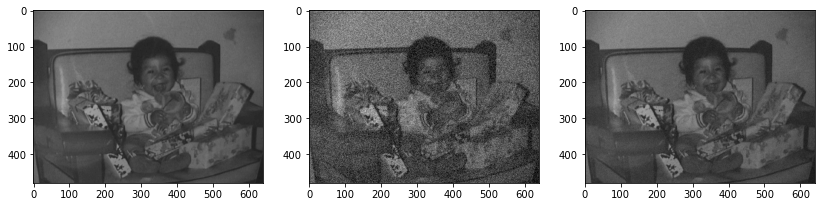

In [4]:
#Filtering config
n = 30
noise_level = 130

#Filtering
noisy = img_g + noise_level * (np.random.random(img_g.shape).astype(np.float32)-.5)
mean = sum([img_g + noise_level * (np.random.random(img_g.shape).astype(np.float32)-.5) for i in range(n)])/n

fig, axs = plt.subplots(1, 3)
fig.set_size_inches(14, 14)
axs[0].imshow(img_g,cmap="gray", vmin=0, vmax=255)
axs[1].imshow(noisy,cmap="gray", vmin=0, vmax=255)
axs[2].imshow(mean,cmap="gray", vmin=0, vmax=255)

plt.show()

In [94]:
def sp_noise(img, pr):
    img_ = img.copy()
    h, w = img_.shape
    mask = np.random.choice((0, 1, 2), size=(h, w), p=[(1 - pr), (pr) / 2., (pr) / 2.])
    img_[mask == 2] = 255 # salt noise
    img_[mask == 1] = 0 # 
    return img_

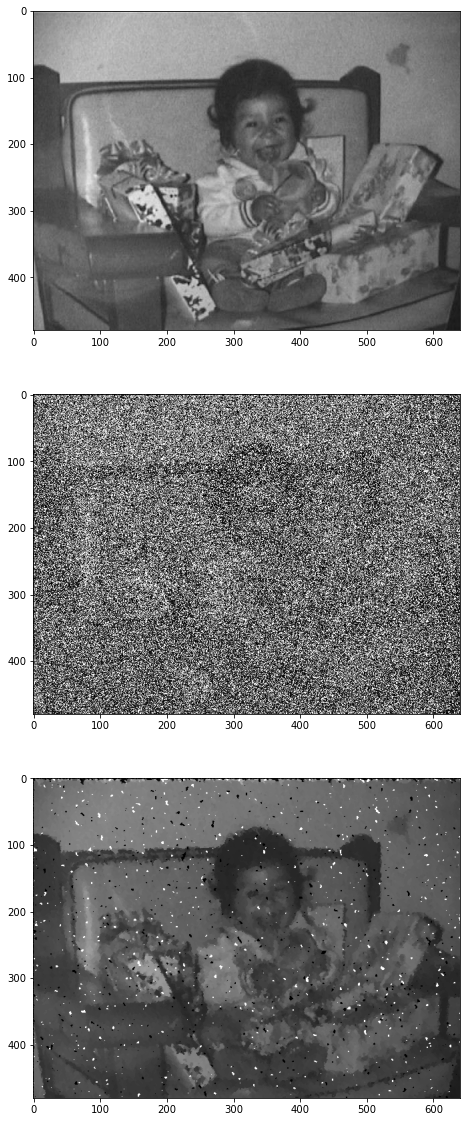

In [97]:
fig, axs = plt.subplots(3, 1)
fig.set_size_inches(20, 20)

#Filtering config

kernel_size = 3
filtering_n = 1
img_g = to_gray(np.array(img)).astype(int)
noisy = sp_noise(img_g,0.6)
axs[0].imshow(img_g,cmap="gray")
axs[1].imshow(noisy,cmap="gray", vmin=1, vmax=255)

#Filtering


for k in range(filtering_n): 
    for i in range(noisy.shape[0]-kernel_size//2):
        for j in range(noisy.shape[1]-kernel_size//2):
            sort_window = np.sort(noisy[i:i+kernel_size,j:j+kernel_size].flatten())
            median = sort_window[len(sort_window)//2]
            noisy[i+kernel_size//2,j+kernel_size//2] = median
            
axs[2].imshow(noisy,cmap="gray")
#axs[2].imshow([[255,0],[0,255]], vmin=0, vmax=255,cmap="gray")
